Gerekli Kütüphanelerin tanımlanması


In [1]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')

# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Global Parameters
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Veri seti yükleme fonsiyonu**

In [2]:
def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin-1')
    dataset.columns = cols
    return dataset

İstenmeyen kolonları silme fonksiyonu

In [3]:
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

**Metinleri temizlemek için gerekli fonksiyon**

In [4]:
def preprocess_text(text):
    text.lower()
    # Remove urls
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    text = re.sub(r'\@\w+|\#','', text)
    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    text_tokens = word_tokenize(text)
    filtered_words = [w for w in text_tokens if not w in stop_words]
    
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(w) for w in filtered_words]
    #lemmatizer = WordNetLemmatizer()
    #lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in stemmed_words]
    
    
    
    return " ".join(filtered_words)

**Veri setlerinin yüklenmesi**

In [5]:
"""
from google.colab import files
  
  
uploaded = files.upload()
"""
# Load dataset

dataset1 = load_dataset("all-data.csv", ['Sentiment', 'Text'])
dataset2 = load_dataset("stock_data.csv", ['Text' , 'Sentiment'])

dataset1

,Sentiment,Text
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,negative,LONDON MarketWatch -- Share prices ended lower...
4841,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4843,negative,Net sales of the Paper segment decreased to EU...


Veri setindeki sentimentlara karşılık gelmesini istedğimiz sayıların belirlenmesi:
Pozitif: 2
Nötr: 1
Negatif: 0 

olarak belirlenmiştir.

In [6]:
sentiment  = {'negative': 0,'neutral': 1,'positive':2} 

dataset1.Sentiment = [sentiment[item] for item in dataset1.Sentiment]
dataset1

,Sentiment,Text
0,1,Technopolis plans to develop in stages an area...
1,0,The international electronic industry company ...
2,2,With the new production plant the company woul...
3,2,According to the company 's updated strategy f...
4,2,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...
...,...,...
4840,0,LONDON MarketWatch -- Share prices ended lower...
4841,1,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4842,0,Operating profit fell to EUR 35.4 mn from EUR ...
4843,0,Net sales of the Paper segment decreased to EU...


İki farklı veri seti ile çalıştığımız bu projede en verimli şeklini bulmak için çeşitli kombinasyonlar denedik. Önce iki farklı veri setini teker teker dendik. Sonrasında ikisini birleştirerek dendik. Ama tüm denemelerimizin sonucunda dataset1 veri setindeki sacede nötr olan sentimentları seçip dataset2 veri seti ile birleştirince en verimli sonucu elde ettğimizi gördük.
Burada da dataset1 veri setinin sadece nötr sentimentlarının seçilmesi işlemi yapılmaktadır.

In [7]:
dataset1 = dataset1[dataset1['Sentiment'] == 1]
dataset1

,Sentiment,Text
0,1,Technopolis plans to develop in stages an area...
57,1,At the request of Finnish media company Alma M...
58,1,"In Sweden , Gallerix accumulated SEK denominat..."
59,1,The company supports its global customers in d...
60,1,"When this investment is in place , Atria plans..."
...,...,...
4818,1,"Nevertheless , the development can not be allo..."
4819,1,"Besides , as there is no depositor preference ..."
4822,1,It holds 38 percent of Outokumpu 's shares and...
4825,1,Mobile communication and wireless broadband pr...


dataset2 veri setinde negatif haberler -1, pozitif haberler ise 1 olarak sentiment edilmişti. Veri setlerini birleştirirken senkronizasyon açısından problem çıkmaması için burada da Pozitif: 2, Negatif: 0 olarak revize edilmiştir.

In [8]:
sentiment  = {-1: 0, 1: 2} 

dataset2.Sentiment = [sentiment[item] for item in dataset2.Sentiment] 
dataset2

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,2
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,2
2,user I'd be afraid to short AMZN - they are lo...,2
3,MNTA Over 12.00,2
4,OI Over 21.37,2
...,...,...
5786,Industry body CII said #discoms are likely to ...,0
5787,"#Gold prices slip below Rs 46,000 as #investor...",0
5788,Workers at Bajaj Auto have agreed to a 10% wag...,2
5789,"#Sharemarket LIVE: Sensex off dayâs high, up...",2


dataset1 grafik:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


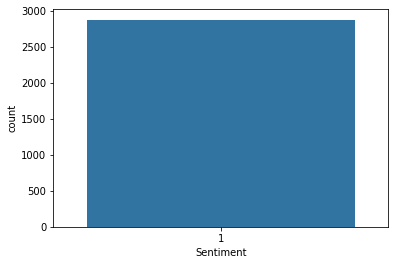

In [9]:
import seaborn as sns

sns.countplot(dataset1.Sentiment)

dataset2 grafik:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


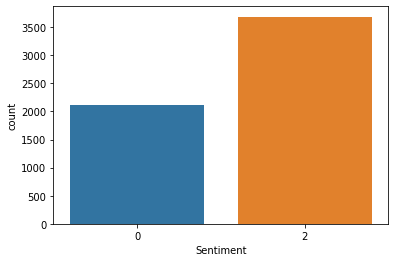

In [10]:
sns.countplot(dataset2.Sentiment)

İki veri seti birleştirilerek dataset değişkenine atanmıştır. Buradan sonra bu dataset veri seti üzerinden işlemlerimize devam edeceğiz.

In [11]:
dataset = dataset1.append(dataset2, ignore_index=True)
dataset

,Sentiment,Text
0,1,Technopolis plans to develop in stages an area...
1,1,At the request of Finnish media company Alma M...
2,1,"In Sweden , Gallerix accumulated SEK denominat..."
3,1,The company supports its global customers in d...
4,1,"When this investment is in place , Atria plans..."
...,...,...
8664,0,Industry body CII said #discoms are likely to ...
8665,0,"#Gold prices slip below Rs 46,000 as #investor..."
8666,2,Workers at Bajaj Auto have agreed to a 10% wag...
8667,2,"#Sharemarket LIVE: Sensex off dayâs high, up..."


**"dataset" veri setinin grafiği**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


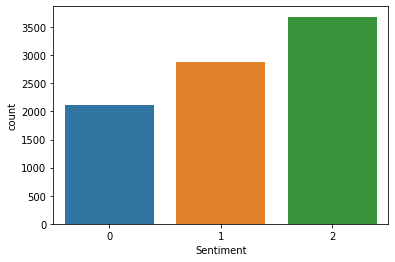

In [12]:
sns.countplot(dataset.Sentiment)

BeautifulSoup kütüphanesi kullanılarak veri setindeki textlerin temizlenmesi fonksiyonu yazılmıştır ve 'Text' kolonuna işlenmiştir.

In [13]:
from bs4 import BeautifulSoup
from textblob import TextBlob
nltk.download('punkt')
def cleanText(text):
    def form_sentence(text):
        text_blob = TextBlob(text)
        return ' '.join(text_blob.words)
    
    text = form_sentence(text)
    text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    text = re.sub(r'http\S+', r'<URL>', text)
    text = text.lower()
    text = text.replace('x', '')
    return text

dataset['Text'] = dataset['Text'].apply(cleanText)
dataset


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Sentiment,Text
0,1,technopolis plans to develop in stages an area...
1,1,at the request of finnish media company alma m...
2,1,in sweden galleri accumulated sek denominated ...
3,1,the company supports its global customers in d...
4,1,when this investment is in place atria plans t...
...,...,...
8664,0,industry body cii said discoms are likely to s...
8665,0,"gold prices slip below rs 46,000 as investors ..."
8666,2,workers at bajaj auto have agreed to a 10 wage...
8667,2,sharemarket live sense off dayâs high up 600...


Veri setindeki sentiment sayıları:

In [14]:
dataset['Sentiment'].value_counts()

2    3685
1    2878
0    2106
Name: Sentiment, dtype: int64

Gensim kütüphanesindeki hazır fonksiyonlar kullanılarak remove stopwords işlemi yapılmıştır. 'to', 'the' gibi kelimeler temizlenmiştir.

In [15]:

# Removing the stop words
from gensim.parsing.preprocessing import remove_stopwords

dataset['Text'] = dataset['Text'].apply(remove_stopwords)
dataset

,Sentiment,Text
0,1,"technopolis plans develop stages area 100,000 ..."
1,1,request finnish media company alma media 's ne...
2,1,sweden galleri accumulated sek denominated sal...
3,1,company supports global customers developing n...
4,1,investment place atria plans epand moscow market
...,...,...
8664,0,industry body cii said discoms likely suffer n...
8665,0,"gold prices slip rs 46,000 investors book prof..."
8666,2,workers bajaj auto agreed 10 wage cut period a...
8667,2,sharemarket live sense dayâs high 600 points...


Veri seti train ve test işlemleri için ikiye bölünürken textleri bölmek için gerekli tokenize_text fonksiyonu, nltk kütüphanesi kullanılarak, yazılmıştır.

In [16]:
train, test = train_test_split(dataset, test_size= 0.000001, random_state=42)

def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            #if len(word) < 0:
            if len(word) <= 0:
                continue
            tokens.append(word.lower())
    return tokens

Burada ise verilerin tokenize edilmesi ve eğitime hazırlanması için gerekli fonksiyonlar ve kodlar yazılmıştır. Tokenize edildikten sonra kaç unique token olduğu yazdırılmıştır.

In [17]:
from gensim.models.doc2vec import TaggedDocument
import nltk
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


train_tagged = train.apply(lambda r: TaggedDocument(words=tokenize_text(r['Text']), tags=[r.Sentiment]), axis=1)
test_tagged = test.apply(lambda r: TaggedDocument(words=tokenize_text(r['Text']), tags=[r.Sentiment]), axis=1)

# The maximum number of words to be used. (most frequent)
max_fatures = 500000

# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 50

#tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer = Tokenizer(num_words=max_fatures, split=' ', filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(dataset['Text'].values)
X = tokenizer.texts_to_sequences(dataset['Text'].values)
X = pad_sequences(X)
print('Found %s unique tokens.' % len(X))

Found 8669 unique tokens.


Oluşturacağımız model için verilerimizi aynı boyuta getirmemiz gerekiyor. Burada bu işlem yapılmıştır.
Ardından matris boyutları yazdırılmıştır.

In [18]:
X = tokenizer.texts_to_sequences(dataset['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (8669, 50)


Bölünmüş ve eğitime hazır textlerden birinin örneği:

In [19]:
train_tagged.values[30]

TaggedDocument(words=['ino', 'wow', 'nice', 'accumulation', 'today', 'heavy'], tags=[2])

Doc2Vec kullanılarak bir paragraftaki kelimelerin olasılık dağılımını tahmin etme görevi üzerine bir sinir ağını eğitmeyi hedefliyoruz. Gerekli kodlar yazılmıştır. 


In [20]:
from gensim.models import Doc2Vec
from tqdm import tqdm
from sklearn import utils

model_dbow = Doc2Vec(dm=1, dm_mean=1, size=20, window=8, min_count=1, workers=1, alpha=0.065, min_alpha=0.065)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

/usr/local/lib/python3.7/dist-packages/gensim/models/doc2vec.py:570: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")
100%|██████████| 8668/8668 [00:00<00:00, 755438.37it/s]


doc2vec modelini Gensim'de eğitmek için modeli başlattık ve 30 dönem için eğittik. 

In [21]:
%%time
for epoch in range(30):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=1)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|██████████| 8668/8668 [00:00<00:00, 1822093.27it/s]


CPU times: user 17 s, sys: 125 ms, total: 17.1 s
Wall time: 17.3 s


In [22]:
print(model_dbow)

Doc2Vec(dm/m,d20,n5,w8,s0.001)


In [23]:
len(model_dbow.wv.vocab)


17191

Eğitim esndasında verilerin daha iyi anlaşılması için embedding işlemi yapılmıştır.

In [24]:
from gensim.models import KeyedVectors


# save the vectors in a new matrix
embedding_matrix = np.zeros((len(model_dbow.wv.vocab)+ 1, 20))

for i, vec in enumerate(model_dbow.docvecs.vectors_docs):
    while i in vec <= 1000:
    #print(i)
    #print(model.docvecs)
        embedding_matrix[i]=vec
    #print(vec)
    #print(vec[i])

Sequential ve LSTM kullanılarak model hazırlanmıştır.

In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding


# init layer
model = Sequential()

# emmbed word vectors
model.add(Embedding(len(model_dbow.wv.vocab)+1,20,input_length=X.shape[1],weights=[embedding_matrix],trainable=True))

# learn the correlations
def split_input(sequence):
    return sequence[:-1], tf.reshape(sequence[1:], (-1,1))


model.add(LSTM(50,return_sequences=False))
model.add(Dense(3,activation="softmax"))

# output model skeleton
model.summary()
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 20)            343840    
_________________________________________________________________
lstm (LSTM)                  (None, 50)                14200     
_________________________________________________________________
dense (Dense)                (None, 3)                 153       
Total params: 358,193
Trainable params: 358,193
Non-trainable params: 0
_________________________________________________________________


Eğitim ve test verileri olmak üzere verileri bölme işlemi yaptık. Matris boyutları yazdırılmıştır.

In [26]:
Y = pd.get_dummies(dataset['Sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7368, 50) (7368, 3)
(1301, 50) (1301, 3)


Model 50 epoch olmak üzere eğitime başlıyor.

In [27]:
batch_size = 32
history=model.fit(X_train, Y_train, epochs =50, batch_size=batch_size, verbose = 2)

Epoch 1/50
231/231 - 8s - loss: 0.4643 - acc: 0.6239
Epoch 2/50
231/231 - 6s - loss: 0.2903 - acc: 0.7732
Epoch 3/50
231/231 - 6s - loss: 0.1996 - acc: 0.8761
Epoch 4/50
231/231 - 6s - loss: 0.1018 - acc: 0.9454
Epoch 5/50
231/231 - 6s - loss: 0.0601 - acc: 0.9704
Epoch 6/50
231/231 - 6s - loss: 0.0411 - acc: 0.9805
Epoch 7/50
231/231 - 6s - loss: 0.0294 - acc: 0.9856
Epoch 8/50
231/231 - 6s - loss: 0.0208 - acc: 0.9902
Epoch 9/50
231/231 - 6s - loss: 0.0142 - acc: 0.9946
Epoch 10/50
231/231 - 6s - loss: 0.0133 - acc: 0.9951
Epoch 11/50
231/231 - 6s - loss: 0.0156 - acc: 0.9929
Epoch 12/50
231/231 - 6s - loss: 0.0118 - acc: 0.9951
Epoch 13/50
231/231 - 6s - loss: 0.0095 - acc: 0.9961
Epoch 14/50
231/231 - 6s - loss: 0.0063 - acc: 0.9977
Epoch 15/50
231/231 - 6s - loss: 0.0046 - acc: 0.9984
Epoch 16/50
231/231 - 6s - loss: 0.0065 - acc: 0.9971
Epoch 17/50
231/231 - 6s - loss: 0.0046 - acc: 0.9986
Epoch 18/50
231/231 - 6s - loss: 0.0051 - acc: 0.9977
Epoch 19/50
231/231 - 6s - loss: 0.00

Eğitim sonucu grafiği

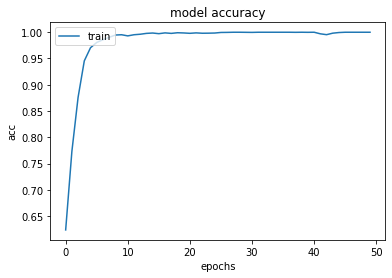

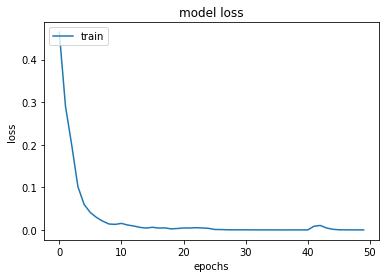

In [28]:
import matplotlib.pyplot as plt


plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Modelin ortalama accuracy hesaplaması

In [29]:
validation_size = 610

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 1, batch_size = batch_size)

print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

22/22 [==============================] - 1s 6ms/step - loss: 0.8524 - acc: 0.8032
score: 0.85
acc: 0.80


In [30]:
# evaluate the model
_, train_acc = model.evaluate(X_train, Y_train, verbose=2)
_, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('Train: %.3f, Test: %.4f' % (train_acc, test_acc))

231/231 - 1s - loss: 3.1918e-04 - acc: 0.9999
22/22 - 0s - loss: 0.8524 - acc: 0.8032
Train: 1.000, Test: 0.8032


In [31]:
# predict probabilities for test set
yhat_probs = model.predict(X_test, verbose=0)
print(yhat_probs)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_test, verbose=0)
print(yhat_classes)
# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 1

[[6.3690733e-11 3.5637715e-10 1.0000000e+00]
 [9.7954002e-13 4.7602699e-12 1.0000000e+00]
 [9.1886085e-01 4.2717261e-07 8.1138693e-02]
 ...
 [3.3773352e-11 1.0000000e+00 1.9548539e-10]
 [2.0394079e-12 1.0136475e-12 1.0000000e+00]
 [1.0000000e+00 1.0068970e-09 1.0825524e-10]]
[2 2 0 0 2 1 1 2 1 2 1 2 0 1 2 1 2 2 2 1 0 0 0 0 0 2 1 0 2 2 0 2 1 0 2 0 2
 1 0 0 0 1 2 1 2 1 1 1 1 2 2 2 0 1 2 0 2 0 2 2 2 1 2 0 0 2 1 1 2 1 2 2 2 2
 0 1 0 1 0 2 2 0 0 0 2 2 0 2 1 0 2 2 1 1 1 2 2 1 0 2 0 2 2 2 1 2 2 0 1 1 2
 1 1 0 0 2 1 1 2 2 1 0 2 1 1 1 1 1 2 0 2 2 1 0 2 2 0 0 1 2 1 0 0 0 2 2 2 2
 2 1 2 1 2 1 2 2 2 0 2 2 0 2 0 1 0 0 0 1 1 1 2 2 2 1 1 2 1 1 2 1 0 2 1 1 2
 0 2 2 2 1 1 1 2 2 1 0 2 1 1 2 2 2 1 2 0 2 0 2 1 1 2 2 1 2 0 0 0 1 2 1 0 1
 0 0 2 2 1 2 1 0 2 1 2 2 0 1 2 1 2 1 2 2 1 0 2 2 2 0 1 2 2 2 2 2 2 2 2 2 1
 0 2 0 1 2 0 1 0 1 2 2 0 2 0 0 2 2 2 2 1 2 1 1 0 2 2 2 2 0 2 1 1 1 2 1 0 2
 1 1 2 0 2 1 1 2 0 2 1 1 2 0 0 1 0 2 2 1 0 2 1 1 2 0 2 2 2 2 2 1 0 2 2 2 2
 2 1 1 1 1 2 1 0 0 1 0 2 0 0 1 2 1 1 1 2 2 0 1 1 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Burada da eğittiğimiz modele göre verilen bir text'in sentiment çıktısını veren fonksiyon yazılmıştır.

In [32]:
def get_result(txt):
    seq = tokenizer.texts_to_sequences(txt)
    padded = pad_sequences(seq, maxlen=X.shape[1], dtype='int32', value=0)
    pred = model.predict(padded)
    labels = [0,1,2]
    result = labels[np.argmax(pred)]
    result_dict = {0: 'negative' , 1: 'neutral', 2: 'positive'}
    print(result)
    return result_dict[result]

In [33]:
m = "Congratulations! you have won a $1,000 Walmart gift card"
get_result([m])

2


'positive'

In [34]:
m = "The local electronics industry is expected to remain stable amid layoff concerns surrounding Japanese electronics giants operating in the country, an official says."
get_result([m])

1


'neutral'

In [35]:
m = "The local electronics industry is amid layoff concerns and last year has laid off tens of employees"
get_result([m])

0


'negative'

Twitter API kodları tanımlanması

In [36]:
import tweepy as tw
from tweepy import OAuthHandler

consumer_key = 'r0kB0712EEOZT3jcVS7t74rfV'
consumer_secret = 'LIVOMWnwm47bpDnk0QjkuAmmY6QgO98P3vBhggEUhtM2Y4dTPo'
access_token = '1051487401451900928-czLgwZmGKlEyiZ33VorWXgeewRgPg8'
access_token_secret = 'JBCjSS6Ee8OW3qlDX2HTTI5ot2fX3lwjqlziLuJ4vdL8j'

In [37]:
try:
    auth = tw.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tw.API(auth)
except:
    print("Error: Authentication Failed")

In [38]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)


In [39]:
def isEnglish(text):
    try:
        text.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

Son 24 saate atılan tweetleri çekmek için gerekli kod hazırlıkları yapılmıştır.

In [40]:
from datetime import datetime, timedelta

now = datetime.today().now()
prev=now-timedelta(days=1)
now=now.strftime("%Y-%m-%d")
prev=prev.strftime("%Y-%m-%d")

query ve count referansları alarak son 24 saatte, ingilizce dilinde atılan, içinde query geçen ve count kadar tweeti bulup çeken fonksiyon yazılmıştır. Bu fonksiyon içinde tweetlerin sentimentlarını da bularak parsed_tweet içinde biriktirmekteyiz.

In [41]:
def get_tweets(query, count):
    tweets = []
    query = query + " -filter:retweets"
    
    try:
        fetched_tweets = tw.Cursor(api.search, 
                                   q = query, 
                                   lang = 'en',
                                  since = prev,
                                  until = now).items(count)
        #api.search(q = query, count = count, lang = 'en')
        
        for tweet in fetched_tweets:
            parsed_tweet = {}
            print(tweet.text)
            if isEnglish(tweet.text) == True:
                parsed_tweet['text'] = preprocess_text(tweet.text)
                parsed_tweet['sentiment'] = get_result([preprocess_text(tweet.text)])
            
                if tweet.retweet_count > 0:
                    if parsed_tweet not in tweets:
                        tweets.append(parsed_tweet)
                    
                else:
                    tweets.append(parsed_tweet)
                
        return tweets
    
    except tw.TweepError as e:
        print("Error : " + str(e))
        

finviz sitesindeki haberleri çekmek için gerekli hazırlık kodları

In [42]:
from urllib.request import urlopen
from urllib.request import Request

tickers = []

# Get Data
finviz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}

Twitterda atılan tweetler için kullanıcıdan input olarak key ve tweet sayısı alınıyor.

In [43]:
#key = '#' + input ("Enter key or hashtag to search about: ")

key = input ("Enter key or hashtag to search about: ")
numberOfTweets = int(input("Enter how many tweets to analyze: "))

#tickers.append(key)

Enter key or hashtag to search about: TSLA
Enter how many tweets to analyze: 1000


Burada fonksiyon çağırılarak tweetler çekiliyor ve sentimentlara göre ayrılıyor.

In [44]:
tweets = get_tweets(key, numberOfTweets)
pzt_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'positive']
ntr_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'neutral']
neg_tweets = [tweet for tweet in tweets if tweet['sentiment'] == 'negative']


Tesla China demand powers ahead with record registrations 🏣🔋🇨🇳 “More than 35,000 cars registered in March,”… https://t.co/l8j0bOm2tf
$CAT RUNNING PREMARKET. NEWS ARTICLE OUT!💸📈

$SGMA $JFIN $NVTR $NNDM $DMPI $TER $MANH $EMMA $CNAT $ACST $SNAP $HOME… https://t.co/WfmmEDBVFk
$IFBD IPO Tomorrow will be HUGE

CEO developed HP UX operating system at $HPQ

Partnership with $DELL

Client list… https://t.co/o2FZA2qn9z
Tomorrow is #DogeDay
Some will sell, many will HODL $DOGE

Watchlist 4.20
$CLOV $TSLA $NIO $GME
2
📈 Building brick by brick, our analysts motto!

👏Pay a visit to our Community

$CGM $APT $JAKK $DYNT $SPV $LMND… https://t.co/49kQHuJtM9
@_tetration_ @HelperTesla if you like beer, 50% of your friend would love wine :P if you love seaside, 50% of your… https://t.co/eDzKcuVhgs
China official Xinhua urges Tesla to match users' expectations.
#Tesla #TSLA
2
This $TSLA news cycle is exhausting!! People who have no idea how the car works proclaiming exactly what happened.… https://t.co/Kq2

In [45]:
pzt_tweets

[{'sentiment': 'positive',
  'text': 'Tomorrow DogeDay Some sell many HODL DOGE Watchlist 420 CLOV TSLA NIO GME'},
 {'sentiment': 'positive',
  'text': 'China official Xinhua urges Tesla match users expectations Tesla TSLA'},
 {'sentiment': 'positive',
  'text': 'AP turn unexpectedly say With notification driver TSLA TSLAQ'},
 {'sentiment': 'positive',
  'text': 'I wonder interior camera active recording time Houston crash TSLA'},
 {'sentiment': 'positive', 'text': 'TSLA Auto drive regulations coming soon'},
 {'sentiment': 'positive',
  'text': 'XINHUA HAS URGED TESLA TO MEET USERS NEEDS TSLA'},
 {'sentiment': 'positive', 'text': 'Ladies Gentlemen got TSLA TSLAQ'},
 {'sentiment': 'positive',
  'text': 'In opinion cryptocurrency Entrepreneurship tsla little babies'},
 {'sentiment': 'positive',
  'text': 'Yes I never based investment thesis news News sensational sell Bought tsla 707 last night'},
 {'sentiment': 'positive',
  'text': 'A saboteur soon appear destroy data Where Martin Trip 

In [46]:
ntr_tweets

[{'sentiment': 'neutral',
  'text': 'You 2M US Burn wisely tsla doge btc eth lte mstr sq arkk'},
 {'sentiment': 'neutral',
  'text': 'Did really link personal injury attorney tsla'},
 {'sentiment': 'neutral',
  'text': 'TSLA offer insurance package cars monthly payments'},
 {'sentiment': 'neutral', 'text': 'disgusting'},
 {'sentiment': 'neutral',
  'text': 'TSLA company people think IMO Its shell things'},
 {'sentiment': 'neutral', 'text': 'Yayaus please'},
 {'sentiment': 'neutral', 'text': 'Were drinking'},
 {'sentiment': 'neutral', 'text': 'say'},
 {'sentiment': 'neutral',
  'text': 'Our young children adults going know TSLA vehicles'},
 {'sentiment': 'neutral', 'text': 'TSLA FUD full force Same source min apart'},
 {'sentiment': 'neutral',
  'text': 'Did know Nor I ever 3000 tsla stocksas much Id love'},
 {'sentiment': 'neutral',
  'text': 'Data logs recovered far show Autopilot enabled amp car purchase FSD TSLA'},
 {'sentiment': 'neutral',
  'text': 'need know tsla media pushing co

In [47]:
neg_tweets

[{'sentiment': 'negative', 'text': 'Oh yeahTSLA skyrocket tomorrow'},
 {'sentiment': 'negative', 'text': 'Not yet Im happy TSLA'},
 {'sentiment': 'negative',
  'text': 'XINHUA CHINAS OFFICIAL NEWS AGENCY HAS URGED TESLA TO PROVIDE HIGHQUALITY SERVICES TSLA'},
 {'sentiment': 'negative', 'text': 'Right'},
 {'sentiment': 'negative',
  'text': 'Their valuable tech allows streaming stock pumps flaming infernos tsla'},
 {'sentiment': 'negative',
  'text': 'If thought today wild day TSLA I cant wait see tomorrow brings'},
 {'sentiment': 'negative',
  'text': 'TSLA Musk Says Autopilot Was Off Texas Tesla Crash That Killed Two'},
 {'sentiment': 'negative',
  'text': 'TSLA car crashes although sad good buying opportunities'},
 {'sentiment': 'negative', 'text': 'How much lower CCIV LCID go TSLA NIO FSR'},
 {'sentiment': 'negative', 'text': 'Bruh Im tsla stan got ta take L herecome'},
 {'sentiment': 'negative', 'text': 'Not target 3000 Bitch'},
 {'sentiment': 'negative', 'text': 'TSLA flow today 7

Tweetlerin yüzdelik hesaplamaları:

In [48]:
print("Positive tweets percentage: {} %".format(percentage(len(pzt_tweets),len(tweets))))
print("Neutral tweets percentage: {} %".format(percentage(len(ntr_tweets),len(tweets))))
print("Negative tweets percentage: {} %".format(percentage(len(neg_tweets),len(tweets))))




Positive tweets percentage: 80.79268292682927 %
Neutral tweets percentage: 3.9634146341463414 %
Negative tweets percentage: 15.24390243902439 %


In [49]:
positive_p = percentage(len(pzt_tweets),len(tweets))
neutral_p = percentage(len(ntr_tweets),len(tweets))
negative_p = percentage(len(neg_tweets),len(tweets))

positive_p = format(positive_p,'.2f')
negative_p = format(negative_p,'.2f')
neutral_p = format(neutral_p,'.2f')

print("Positive tweets percentage:  %" + positive_p)
print("Neutral tweets percentage:  %" + neutral_p)
print("Negative tweets percentage:  %" + negative_p)

Positive tweets percentage:  %80.79
Neutral tweets percentage:  %3.96
Negative tweets percentage:  %15.24


Finviz sitesindeki sorgulama ve analiz için kullanıcıdan tekrar input alınıyor. Listeye ekleniyor.

In [50]:
f_key = input("Enter finviz key or hashtag to search about: ")

tickers.append(f_key)

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    resp = urlopen(req)    
    html = BeautifulSoup(resp, features="lxml")
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

Enter finviz key or hashtag to search about: TSLA


Finvizde bu ticker ile ilgili girilen son 100 haber çekiliyor.

In [51]:
n = 100
try:
    for ticker in tickers:
        df = news_tables[ticker]
        df_tr = df.findAll('tr')
    
        print ('\n')
        print ('Recent News Headlines for {}: '.format(ticker))
        
        for i, table_row in enumerate(df_tr):
            a_text = table_row.a.text
            td_text = table_row.td.text
            td_text = td_text.strip()
            print(a_text,'(',td_text,')')
            #td_text = pd.to_datetime(td_text)
            print(get_result([a_text]))
            #print(td_text)
            if i == n-1:
                break
except KeyError:
    pass



Recent News Headlines for TSLA: 
ARK Invest Stocks To Buy And Watch: 6 Stocks That Cathie Wood's ARK ETFs Own; Coinbase Tumbles, Tesla Jumps ( Apr-20-21 10:52AM )
2
positive
Dow Jones Falls As Apple Reverses Ahead Of 'Spring Loaded' Event; Tesla Jumps On Price Target Boost ( 10:51AM )
0
negative
Options Trading: Consider A Bull Put Spread For Tesla Stock Ahead Of Q1 Earnings Report ( 10:42AM )
0
negative
Xpeng Pres. on autonomous driving: Keeping our customers safe is critical ( 10:02AM )
2
positive
DogeDay hashtags help meme-based cryptocurrency Dogecoin hit new high ( 10:00AM )
2
positive
White House National Climate Advisor aims to cut U.S. emissions ( 10:00AM )
2
positive
DogeDay hashtags help meme-based cryptocurrency Dogecoin hit new high ( 09:51AM )
2
positive
Tesla stock gets a price target boost ahead of earnings, as Mizuho analyst is upbeat on deliveries outlook ( 09:30AM )
2
positive
Musk Says Autopilot Not Engaged in Tesla Crash ( 08:57AM )
0
negative
Dow Jones Futures Si

Haberlerin hepsinin özelliklerini görmek ve buna göre hareket etmek için gerekli kodlamalar yapılmıştır.

In [52]:
# Iterate through the news
parsed_news = []
for file_name, news_table in news_tables.items():
    for x in news_table.findAll('tr'):
        text = x.a.get_text() 
        date_scrape = x.td.text.split()
        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        ticker = file_name.split('_')[0]
        
        parsed_news.append([ticker, date, time, text, "null"])
        
parsed_news

[['TSLA',
  'Apr-20-21',
  '10:52AM',
  "ARK Invest Stocks To Buy And Watch: 6 Stocks That Cathie Wood's ARK ETFs Own; Coinbase Tumbles, Tesla Jumps",
  'null'],
 ['TSLA',
  'Apr-20-21',
  '10:51AM',
  "Dow Jones Falls As Apple Reverses Ahead Of 'Spring Loaded' Event; Tesla Jumps On Price Target Boost",
  'null'],
 ['TSLA',
  'Apr-20-21',
  '10:42AM',
  'Options Trading: Consider A Bull Put Spread For Tesla Stock Ahead Of Q1 Earnings Report',
  'null'],
 ['TSLA',
  'Apr-20-21',
  '10:02AM',
  'Xpeng Pres. on autonomous driving: Keeping our customers safe is critical',
  'null'],
 ['TSLA',
  'Apr-20-21',
  '10:00AM',
  'DogeDay hashtags help meme-based cryptocurrency Dogecoin hit new high',
  'null'],
 ['TSLA',
  'Apr-20-21',
  '10:00AM',
  'White House National Climate Advisor aims to cut U.S. emissions',
  'null'],
 ['TSLA',
  'Apr-20-21',
  '09:51AM',
  'DogeDay hashtags help meme-based cryptocurrency Dogecoin hit new high',
  'null'],
 ['TSLA',
  'Apr-20-21',
  '09:30AM',
  'Tesla s

Ticker hakkında girilen son 10 haber üzerinden işlem yapılmak için gerekli kodlamalar yapılıyor.

In [53]:
# Set column names
columns = ['ticker', 'date', 'time', 'headline', 'sentiments']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_news = pd.DataFrame(parsed_news, columns=columns)

#parsed_news = parsed_news[parsed_news['date'] == parsed_news['date'][0]]

parsed_news = parsed_news.head(10)
parsed_news


,ticker,date,time,headline,sentiments
0,TSLA,Apr-20-21,10:52AM,ARK Invest Stocks To Buy And Watch: 6 Stocks T...,null
1,TSLA,Apr-20-21,10:51AM,Dow Jones Falls As Apple Reverses Ahead Of 'Sp...,null
2,TSLA,Apr-20-21,10:42AM,Options Trading: Consider A Bull Put Spread Fo...,null
3,TSLA,Apr-20-21,10:02AM,Xpeng Pres. on autonomous driving: Keeping our...,null
4,TSLA,Apr-20-21,10:00AM,DogeDay hashtags help meme-based cryptocurrenc...,null
5,TSLA,Apr-20-21,10:00AM,White House National Climate Advisor aims to c...,null
6,TSLA,Apr-20-21,09:51AM,DogeDay hashtags help meme-based cryptocurrenc...,null
7,TSLA,Apr-20-21,09:30AM,Tesla stock gets a price target boost ahead of...,null
8,TSLA,Apr-20-21,08:57AM,Musk Says Autopilot Not Engaged in Tesla Crash,null
9,TSLA,Apr-20-21,08:21AM,Dow Jones Futures Signal Further Losses For 'H...,null


null olan sentimentlar haber başlıklarına göre sentiment analizi yapılıyor.

In [54]:
for index in range(parsed_news.index.size):
    parsed_news['sentiments'][index] = get_result([parsed_news['headline'][index]])

2
0
0
2
2
2
2
2
0
2


In [55]:
parsed_news

,ticker,date,time,headline,sentiments
0,TSLA,Apr-20-21,10:52AM,ARK Invest Stocks To Buy And Watch: 6 Stocks T...,positive
1,TSLA,Apr-20-21,10:51AM,Dow Jones Falls As Apple Reverses Ahead Of 'Sp...,negative
2,TSLA,Apr-20-21,10:42AM,Options Trading: Consider A Bull Put Spread Fo...,negative
3,TSLA,Apr-20-21,10:02AM,Xpeng Pres. on autonomous driving: Keeping our...,positive
4,TSLA,Apr-20-21,10:00AM,DogeDay hashtags help meme-based cryptocurrenc...,positive
5,TSLA,Apr-20-21,10:00AM,White House National Climate Advisor aims to c...,positive
6,TSLA,Apr-20-21,09:51AM,DogeDay hashtags help meme-based cryptocurrenc...,positive
7,TSLA,Apr-20-21,09:30AM,Tesla stock gets a price target boost ahead of...,positive
8,TSLA,Apr-20-21,08:57AM,Musk Says Autopilot Not Engaged in Tesla Crash,negative
9,TSLA,Apr-20-21,08:21AM,Dow Jones Futures Signal Further Losses For 'H...,positive


In [56]:
parsed_news['sentiments'].value_counts(normalize=True) * 100

positive    70.0
negative    30.0
Name: sentiments, dtype: float64

In [57]:
pzt_news = parsed_news[parsed_news['sentiments'] == 'positive']
pzt_news

,ticker,date,time,headline,sentiments
0,TSLA,Apr-20-21,10:52AM,ARK Invest Stocks To Buy And Watch: 6 Stocks T...,positive
3,TSLA,Apr-20-21,10:02AM,Xpeng Pres. on autonomous driving: Keeping our...,positive
4,TSLA,Apr-20-21,10:00AM,DogeDay hashtags help meme-based cryptocurrenc...,positive
5,TSLA,Apr-20-21,10:00AM,White House National Climate Advisor aims to c...,positive
6,TSLA,Apr-20-21,09:51AM,DogeDay hashtags help meme-based cryptocurrenc...,positive
7,TSLA,Apr-20-21,09:30AM,Tesla stock gets a price target boost ahead of...,positive
9,TSLA,Apr-20-21,08:21AM,Dow Jones Futures Signal Further Losses For 'H...,positive


In [58]:
ntr_news = parsed_news[parsed_news['sentiments'] == 'neutral']
ntr_news

,ticker,date,time,headline,sentiments


In [59]:
neg_news = parsed_news[parsed_news['sentiments'] == 'negative']
neg_news

,ticker,date,time,headline,sentiments
1,TSLA,Apr-20-21,10:51AM,Dow Jones Falls As Apple Reverses Ahead Of 'Sp...,negative
2,TSLA,Apr-20-21,10:42AM,Options Trading: Consider A Bull Put Spread Fo...,negative
8,TSLA,Apr-20-21,08:57AM,Musk Says Autopilot Not Engaged in Tesla Crash,negative


Finviz haberlerine göre yüzdelik hesaplamalar:

In [60]:
perc_pzt = percentage(pzt_news.size, parsed_news.size)
perc_ntr = percentage(ntr_news.size, parsed_news.size)
perc_neg = percentage(neg_news.size, parsed_news.size)


perc_pzt = format(perc_pzt,'.2f')
perc_ntr = format(perc_ntr,'.2f')
perc_neg = format(perc_neg,'.2f')

print("Positive news percentage:  %" + perc_pzt)
print("Neutral news percentage:  %" + perc_ntr)
print("Negative news percentage:  %" + perc_neg)

Positive news percentage:  %70.00
Neutral news percentage:  %0.00
Negative news percentage:  %30.00


Twitter analizi pasta grafiği

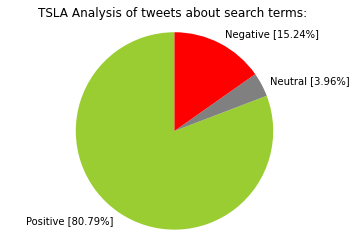

In [61]:
labels = ['Positive ['+str(positive_p)+'%]','Neutral ['+str(neutral_p)+'%]','Negative ['+str(negative_p)+'%]']
sizes = [positive_p, neutral_p, negative_p]
colors = ['yellowgreen','gray','red']
fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,startangle=90,colors=colors)
plt.title(key + " " + "Analysis of tweets about search terms: ")
ax.axis('equal')

plt.show()

Finviz analizi pasta grafiği:

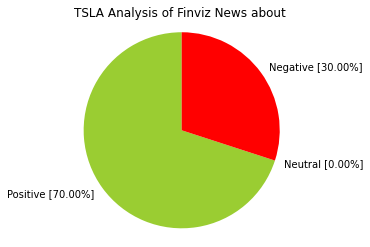

In [62]:
labels = ['Positive ['+str(perc_pzt)+'%]','Neutral ['+str(perc_ntr)+'%]','Negative ['+str(perc_neg)+'%]']
sizes = [perc_pzt, perc_ntr, perc_neg]
colors = ['yellowgreen','gray','red']
fig, ax = plt.subplots()
ax.pie(sizes,labels=labels,startangle=90,colors=colors)
plt.title(f_key + " " + "Analysis of Finviz News about ")
ax.axis('equal')

plt.show()